#### FFTW from module pyFFTW 

Examples of use. The Fast Fourier transform can be used from the 
numpy module *numpy.fft* and the documentation for this module will
be enough to get going with Fourier transform. 

Here instead we advocate the *pyFFTW* package which actually is a 
port of the original fftw algorithm in C/C++ (with built-in optimisation). 



<div class="alert alert-block alert-info">
If the pyFFTW package is not installed, you may install it in your own virtual environment with the <it> pip </it>  utility. This was discussed during the first semester. 
</div>

__Modules to load up__ 

In [2]:
import numpy as np 
import pyfftw
from IPython.display import display, Markdown, Math

__Two examples in 1D__ 

We always use complex variables but in principle that should be 
essential especially when using the _builder_ approach (see below). 

In [3]:
# Tests 1d 
#
TYPE = "complex128"
N = 64
a = pyfftw.empty_aligned(N, dtype=TYPE) 
b = pyfftw.empty_aligned(N, dtype=TYPE)

# The transformation object take "a" to "b" in Fourier space.
fft_object = pyfftw.FFTW(a, b)

# Generate some data - random (white noise), single Fourier mode
#
# 1) White noise (unit amplitude)
# ar, ai = np.random.randn(2, N)
#a[:] = ar + 1j*ai*0

# 2 Fourier mode
x = np.linspace( -16, +16, N )  # increment dx = delta = 1 ; 32 = N/2 
k = 8*2*np.pi   # Wavenumber k is a multiple of 2pi 
a[:] = np.sin( k*x )      # Signal : a simple sine wave  
if( TYPE == "complex128"):
    a[:] += 1j*x*0        # The imaginary part is set to 0. 

Delta = ( x.max() - x.min() ) / N 

# Perform the FFT : forward default direction 
#
fft_ = fft_object() 
print( type(x), x.shape ) 
print( type(a), a.shape, fft_ is b )

# Recover wavenumbers / frequencies from FFT : 
#
wavenumbers = np.fft.fftfreq(len(x))
for i, lambda_ in enumerate(wavenumbers):
    display(Math(\
    r"{index:2d}\ k/2\pi, \lambda : {kappa:2d}\ \ {lamb:6.4f}\  \,coeff\, = ({bb:6.4f})".format(index=i, kappa=int(i/Delta), lamb=lambda_/Delta , bb=b[i])))

<class 'numpy.ndarray'> (64,)
<class 'numpy.ndarray'> (64,) True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<div class="alert alert-block alert-info">
    Note - changing the range of $x: -32 \rightarrow +32$, will change the 
    definition of the step $dx = \Delta = 1$. For the wavenumbers, we  have </div> 
$ k_n = \frac{n}{N\Delta}, n = -N/2, ... +N/2 $ 
<div class="alert alert-block alert-info">
So, for example, if $x$ is rescaled to $x: -16 \rightarrow +16$, 
then the new increment $\Delta = 1/2$ and the new wavenumber $k$ is
changed to index $n = 8 / 2 = 4$. The physical wavenumber is still 8 (in units of 2$\pi$), but the index in the vecteur is changed !
</div>  
    
    

In [4]:
bb = b*b.conjugate() 
print( bb[8], np.max( bb.real ) )

(0.48082812940207564+0j) 994.2240700250557


In [5]:
# Backward FFT : 
#
c = pyfftw.empty_aligned(N, dtype=TYPE)
ifft_object = pyfftw.FFTW(b, c, direction='FFTW_BACKWARD')

ifft_ = ifft_object() 
print( np.allclose(ifft_,c, rtol=1.e-15) )
print( np.allclose(a,c, rtol=1.e-13) )

True
False


__Check that the reverse FFT recovers the original signal__

In [9]:
np.allclose( c, np.sin( k*x ) + 1j*ai*0, rtol=1.e-13 ) 

NameError: name 'ai' is not defined

__Examples using a 2D signal__ 

This is done using a numpy mesh in _x_ and _y_ . 

In [3]:
# Try a 2D distribution 
#
N  = 64
k = 2*np.pi 
TYPE = "complex128"
x,y = np.linspace( -np.pi, +np.pi, N, dtype=TYPE), np.linspace( -np.pi, np.pi,N, dtype=TYPE)

X,Y = np.meshgrid( x, y )

a = pyfftw.empty_aligned((N, N), dtype=TYPE)
a[:] = np.sin( k*X ) + np.cos( k/2*Y ) 
if( TYPE == "complex128"):
    a[:] += 1j*X*0

b = pyfftw.empty_aligned((N,N), dtype=TYPE)

# Plan an fft over the last axis
#fft_object_a = pyfftw.FFTW(a, b)
#
# Over the first axis only 
#fft_object_b = pyfftw.FFTW(a, b, axes=(0,))

# Over the two axes : The solution is stored un "b"
#
fft_object_2d = pyfftw.FFTW(a, b, axes=(0,1))


In [4]:
fft_2d = fft_object_2d() 

In [5]:
fft_2d is b

True

In [8]:
c = pyfftw.empty_aligned((N,N ), dtype=TYPE)
# Over both axes
ifft_object_2d = pyfftw.FFTW(b, c, axes=(0,1), direction="FFTW_BACKWARD")

inv_fft_2d = ifft_object_2d() 

In [9]:
print( np.allclose(a,c, rtol=1.e-13) )

True


<div class="alert alert-info"> Visual output of the signal, FFT and reverse FFT </div>

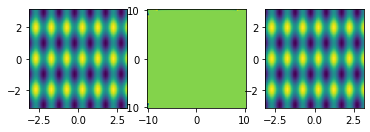

In [124]:
import matplotlib.pyplot as plt 

figures,ax = plt.subplots( 1,3 )

stretch = ( -np.pi, np.pi, -np.pi, +np.pi )
wavek = ( -N/(2*np.pi), N/(2*np.pi), -N/(2*np.pi), +N/(2*np.pi) )
ax[0].imshow( a.real, extent=stretch ), \
ax[1].imshow( b.real, extent=wavek ), \
ax[2].imshow(c.real, extent=stretch)
plt.show() 

In [10]:
help( pyfftw.builders.fft2)

Help on function fft2 in module pyfftw.builders.builders:

fft2(a, s=None, axes=(-2, -1), overwrite_input=False, planner_effort=None, threads=None, auto_align_input=True, auto_contiguous=True, avoid_copy=False, norm=None)
    Return a :class:`pyfftw.FFTW` object representing a 2D FFT.
    
    The first three arguments are as per :func:`numpy.fft.fft2`;
    the rest of the arguments are documented
    :ref:`in the module docs <builders_args>`.



In [15]:
# Using the "builder" functions to match types automatically 
# 

# We only require to setup a data type array of dimensions N x N 
#
a = pyfftw.empty_aligned((N,N), dtype=TYPE)

# Generate some data - insert in array "a" of type  "complex"
ar, ai = np.random.randn(2, N,N )
a[:] = ar + 1j*ai*0 

# Build the fft using array "a" as input (no other arguements)
#
fft_object = pyfftw.builders.fft(a)

# Perform the FFT : the array "b" is created holding the solution 
#
b = fft_object()
print( "FFT vector b = ", type(b), b.shape )

# Backward FFT - simply evoke the inverse operator ifft() 
#
inv_fft_object = pyfftw.builders.ifft(b) 

c = inv_fft_object()

FFT vector b =  <class 'numpy.ndarray'> (64, 64)


In [16]:
print( np.allclose( a,c, rtol=1.e-15))

True


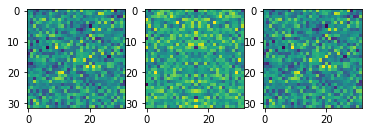

In [84]:
import matplotlib.pyplot as plt 

figures,ax = plt.subplots( 1,3 )

ax[0].imshow( a.real ), ax[1].imshow( b.real ), ax[2].imshow(c.real)
plt.show() 

In [12]:
help(pyfftw.builders.fft)

Help on function fft in module pyfftw.builders.builders:

fft(a, n=None, axis=-1, overwrite_input=False, planner_effort=None, threads=None, auto_align_input=True, auto_contiguous=True, avoid_copy=False, norm=None)
    Return a :class:`pyfftw.FFTW` object representing a 1D FFT.
    
    The first three arguments are as per :func:`numpy.fft.fft`;
    the rest of the arguments are documented
    :ref:`in the module docs <builders_args>`.

